In [43]:
#!pip install scikit-fuzzy

In [44]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import requests
import time

In [45]:
city = "Tehran"
app_id = "ba8b59780697f5a143599ad377705641"
URL = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={app_id}"

r = requests.get(url = URL)

data = r.json()
kelvin = data['main']['temp']
celsius = kelvin - 273.15

print("City: ",city)
print("temp: ",celsius)
print("humidity: ",data['main']['humidity'], "%")
print("wind speed: ",data['wind']['speed'])
print("time: ", time.ctime(int(data['dt'])))

City:  Tehran
temp:  11.730000000000018
humidity:  37 %
wind speed:  3.09
time:  Sat Dec  9 14:55:14 2023


In [46]:
# داده‌های فازی برای دما
temperature = np.arange(0, 101, 1)

# تعریف توابع عضویت برای دما (گرم و سرد)
temperature_cold = fuzz.trimf(temperature, [0, 0, 40])
temperature_warm = fuzz.trimf(temperature, [0, 40, 100])

# مثالی از دسته‌بندی دما
temperature_input = celsius

# محاسبه عضویت دمای ورودی در دسته‌های گرم و سرد
membership_cold = fuzz.interp_membership(temperature, temperature_cold, temperature_input)
membership_warm = fuzz.interp_membership(temperature, temperature_warm, temperature_input)

print("Membership degree in 'Cold' category:", membership_cold)
print("Membership degree in 'Warm' category:", membership_warm)

# تصمیم‌گیری بر اساس مقدار داده‌های فازی
if membership_cold > membership_warm:
    print("The temperature is classified as Cold.")
elif membership_cold < membership_warm:
    print("The temperature is classified as Warm.")
else:
    print("The temperature is on the boundary between Cold and Warm.")

Membership degree in 'Cold' category: 0.7067499999999995
Membership degree in 'Warm' category: 0.29325000000000045
The temperature is classified as Cold.


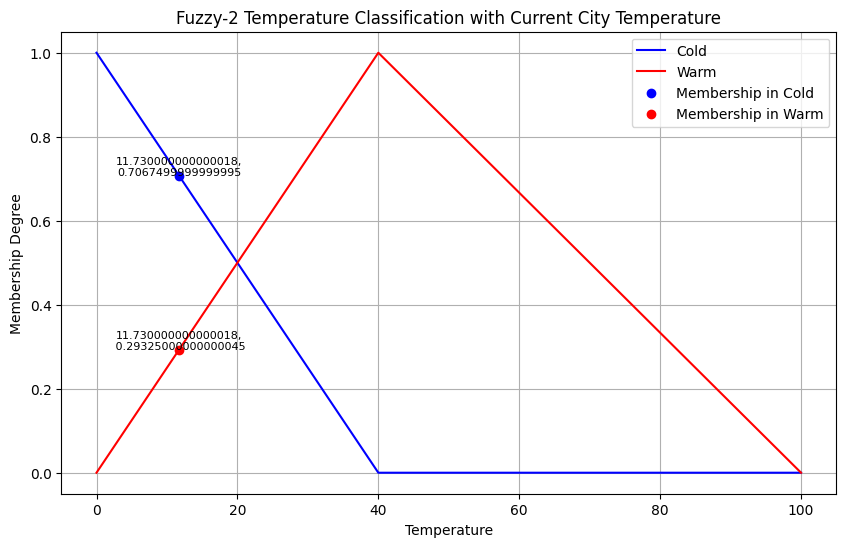

In [47]:
# نمایش مقادیر عضویت در نمودار
plt.figure(figsize=(10, 6))
plt.plot(temperature, temperature_cold, 'b', linewidth=1.5, label='Cold')
plt.plot(temperature, temperature_warm, 'r', linewidth=1.5, label='Warm')

# نشان دادن مقادیر ممبرشیپ‌ها در نمودار
plt.scatter(temperature_input, membership_cold, color='blue', label='Membership in Cold', marker='o')
plt.scatter(temperature_input, membership_warm, color='red', label='Membership in Warm', marker='o')

plt.title('Fuzzy-2 Temperature Classification with Current City Temperature')
plt.ylabel('Membership Degree')
plt.xlabel('Temperature')
plt.text(celsius, membership_warm, f'{celsius},\n {membership_warm}', ha='center', color='black', fontsize=8)
plt.text(celsius, membership_cold, f'{celsius},\n{membership_cold}', ha='center', color='black', fontsize=8)

plt.legend()
plt.grid()
plt.show()

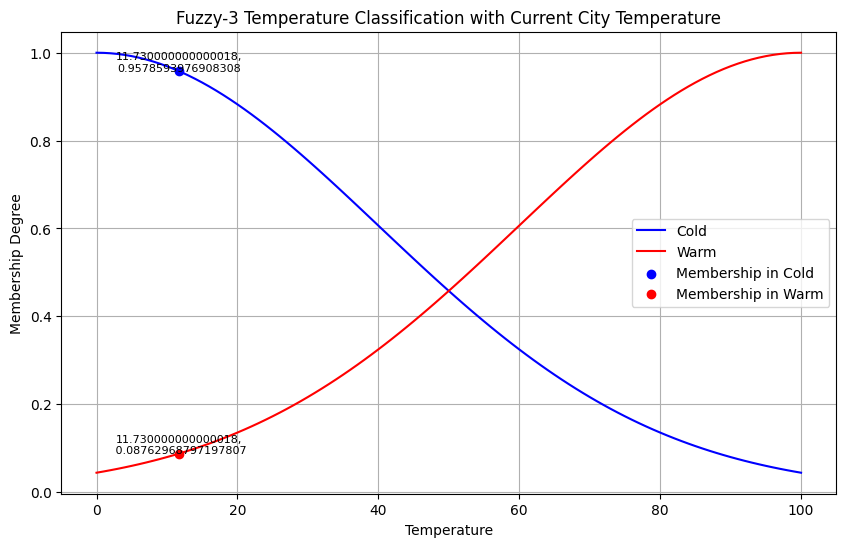

In [50]:
# داده‌های فازی برای دما
temperature = np.arange(0, 101, 1)

# تعریف توابع عضویت برای دما (گرم و سرد) با منطق فازی نوع 3
temperature_cold = fuzz.gaussmf(temperature, 0, 40)
temperature_warm = fuzz.gaussmf(temperature, 100, 40)

# مثالی از دسته‌بندی دما
temperature_input = celsius

# محاسبه عضویت دمای ورودی در دسته‌های گرم و سرد
membership_cold = fuzz.interp_membership(temperature, temperature_cold, temperature_input)
membership_warm = fuzz.interp_membership(temperature, temperature_warm, temperature_input)


# نمایش مقادیر عضویت در نمودار
plt.figure(figsize=(10, 6))
plt.plot(temperature, temperature_cold, 'b', linewidth=1.5, label='Cold')
plt.plot(temperature, temperature_warm, 'r', linewidth=1.5, label='Warm')

# نشان دادن مقادیر ممبرشیپ‌ها در نمودار
plt.scatter(temperature_input, membership_cold, color='blue', label='Membership in Cold', marker='o')
plt.scatter(temperature_input, membership_warm, color='red', label='Membership in Warm', marker='o')

plt.title('Fuzzy-3 Temperature Classification with Current City Temperature')
plt.ylabel('Membership Degree')
plt.xlabel('Temperature')
plt.text(celsius, membership_warm, f'{celsius},\n {membership_warm}', ha='center', color='black', fontsize=8)
plt.text(celsius, membership_cold, f'{celsius},\n{membership_cold}', ha='center', color='black', fontsize=8)

plt.legend()
plt.grid()
plt.show()